<a href="https://colab.research.google.com/github/vinit5112/CustomerChurnPrediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [72]:
data.shape

(100000, 9)

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2fc9454d4c318116242e7ffb70e13b02113239b25321a9af36eebaacf22597cd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

### **EDA**

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

<ipython-input-5-d3d098ccb04f>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
data = data.drop(['CustomerID','Name','Age','Total_Usage_GB','Monthly_Bill'], axis = 1)

In [74]:
data

,Gender,Location,Subscription_Length_Months,Churn
0,Male,Los Angeles,17,0
1,Female,New York,1,0
2,Female,Los Angeles,5,0
3,Female,Miami,3,1
4,Female,Miami,19,0
...,...,...,...,...
99995,Male,Houston,23,1
99996,Female,New York,19,0
99997,Male,Chicago,17,1
99998,Female,New York,20,1


In [75]:
dic = {'Male':1,'Female':0}
data['Gender'] = data['Gender'].map(dic)

In [76]:
data

,Gender,Location,Subscription_Length_Months,Churn
0,1,Los Angeles,17,0
1,0,New York,1,0
2,0,Los Angeles,5,0
3,0,Miami,3,1
4,0,Miami,19,0
...,...,...,...,...
99995,1,Houston,23,1
99996,0,New York,19,0
99997,1,Chicago,17,1
99998,0,New York,20,1


In [77]:
from sklearn.preprocessing import OneHotEncoder

data['Location'] = data['Location'].astype('category')

In [78]:
data['Location'] = data['Location'].cat.codes

In [79]:
enc = OneHotEncoder()

enc_data = pd.DataFrame(enc.fit_transform(data[['Location']]).toarray())

In [80]:
data = data.join(enc_data)

In [81]:
data

,Gender,Location,Subscription_Length_Months,Churn,0,1,2,3,4
0,1,2,17,0,0.0,0.0,1.0,0.0,0.0
1,0,4,1,0,0.0,0.0,0.0,0.0,1.0
2,0,2,5,0,0.0,0.0,1.0,0.0,0.0
3,0,3,3,1,0.0,0.0,0.0,1.0,0.0
4,0,3,19,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1,1,23,1,0.0,1.0,0.0,0.0,0.0
99996,0,4,19,0,0.0,0.0,0.0,0.0,1.0
99997,1,0,17,1,1.0,0.0,0.0,0.0,0.0
99998,0,4,20,1,0.0,0.0,0.0,0.0,1.0


In [82]:
data = data.rename({0:'Chicago',1:'Houston',2:'Los Angeles',3:'Miami',4:'New York'},axis=1)
data

,Gender,Location,Subscription_Length_Months,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,1,2,17,0,0.0,0.0,1.0,0.0,0.0
1,0,4,1,0,0.0,0.0,0.0,0.0,1.0
2,0,2,5,0,0.0,0.0,1.0,0.0,0.0
3,0,3,3,1,0.0,0.0,0.0,1.0,0.0
4,0,3,19,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1,1,23,1,0.0,1.0,0.0,0.0,0.0
99996,0,4,19,0,0.0,0.0,0.0,0.0,1.0
99997,1,0,17,1,1.0,0.0,0.0,0.0,0.0
99998,0,4,20,1,0.0,0.0,0.0,0.0,1.0


In [83]:
#Mean and std. deviation for epileptic
print('Totall Mean VALUE for Churn: {}'.format((data[data['Churn'] == 1].describe().mean()).mean()))
print('Totall Std VALUE for Churn: {}'.format((data[data['Churn'] == 1].describe().std()).std()))

Totall Mean VALUE for Churn: 6223.956390194362
Totall Std VALUE for Churn: 1.354757942760598


In [84]:
print('Totall Mean VALUE for NON Churn: {}'.format((data[data['Churn'] == 0].describe().mean()).mean()))
print('Totall Std VALUE for NON Churn: {}'.format((data[data['Churn'] == 0].describe().std()).std()))

Totall Mean VALUE for NON Churn: 6279.080331984642
Totall Std VALUE for NON Churn: 1.317100571322376


In [85]:
# less diffrence between values hence we will not scale/normalize data

In [86]:
data

,Gender,Location,Subscription_Length_Months,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,1,2,17,0,0.0,0.0,1.0,0.0,0.0
1,0,4,1,0,0.0,0.0,0.0,0.0,1.0
2,0,2,5,0,0.0,0.0,1.0,0.0,0.0
3,0,3,3,1,0.0,0.0,0.0,1.0,0.0
4,0,3,19,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1,1,23,1,0.0,1.0,0.0,0.0,0.0
99996,0,4,19,0,0.0,0.0,0.0,0.0,1.0
99997,1,0,17,1,1.0,0.0,0.0,0.0,0.0
99998,0,4,20,1,0.0,0.0,0.0,0.0,1.0


In [95]:
data = data.drop('Location', axis = 1)

[(<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Churn'),
  [<matplotlib.lines.Line2D at 0x7824b0e93940>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Churn'),
  [<matplotlib.lines.Line2D at 0x7824a5f318d0>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Churn'),
  [<matplotlib.lines.Line2D at 0x7824b00e8e80>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Churn'),
  [<matplotlib.lines.Line2D at 0x7824a60818d0>]),
 (<Figure size 800x400 with 1 Axes>,
  Text(0.5, 1.0, 'Not Churn'),
  [<matplotlib.lines.Line2D at 0x7824b0e7aec0>])]

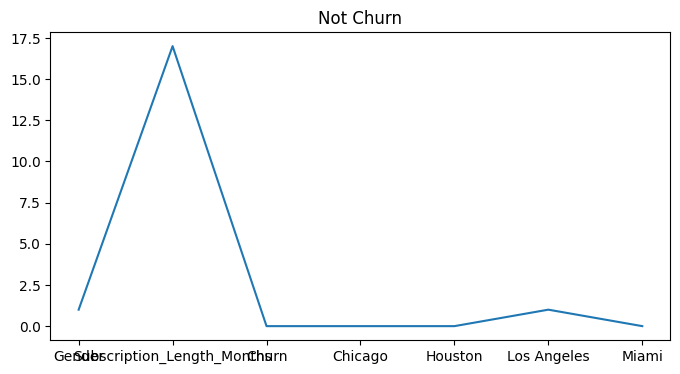

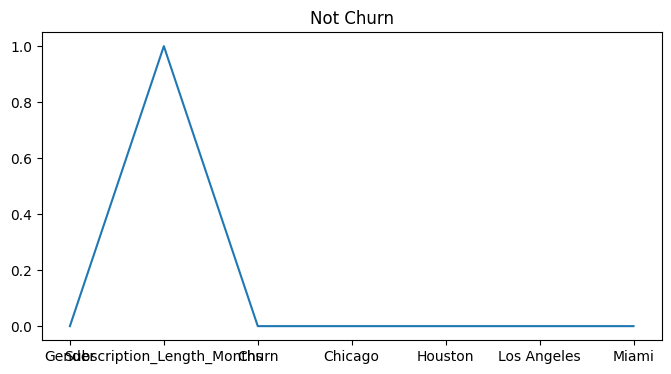

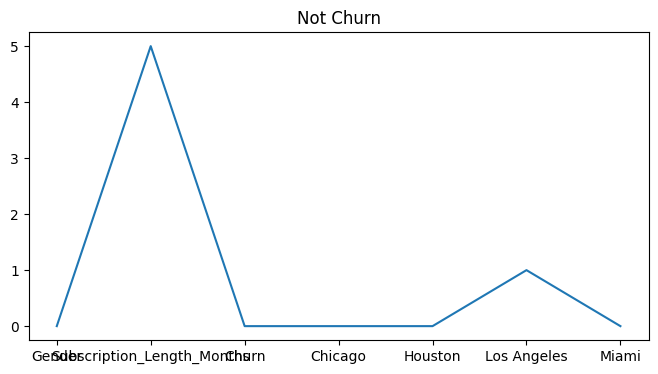

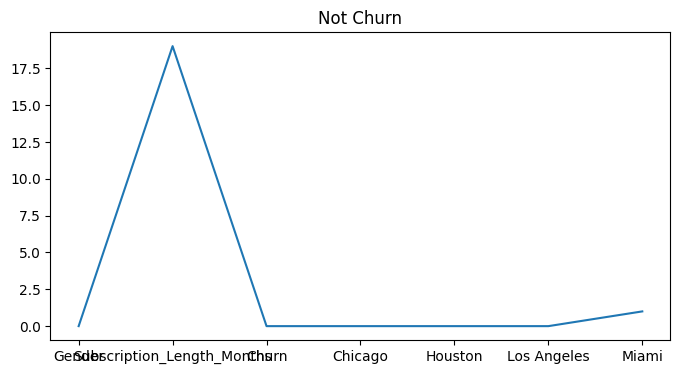

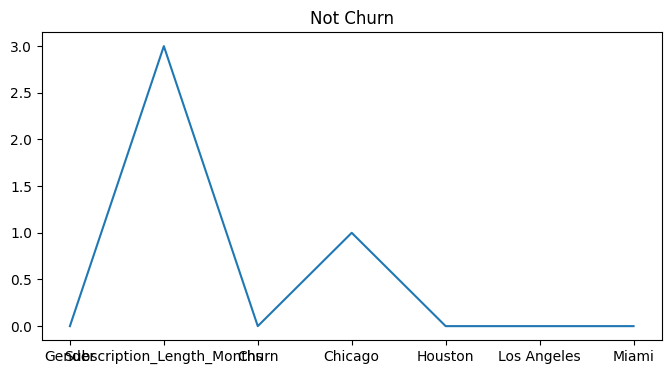

In [96]:
[(plt.figure(figsize=(8,4)), plt.title('Not Churn'), plt.plot(data[data['Churn'] == 0].iloc[i][0:-1])) for i in range(5)]

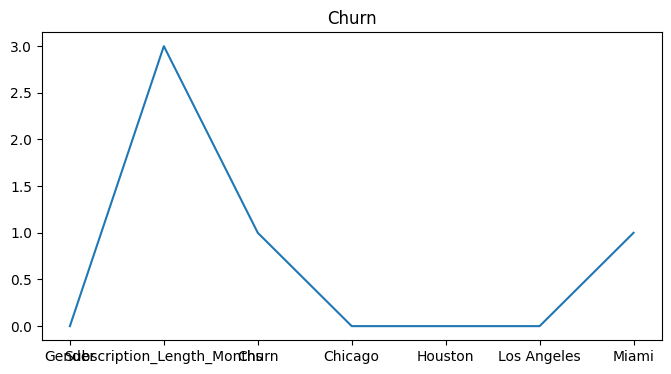

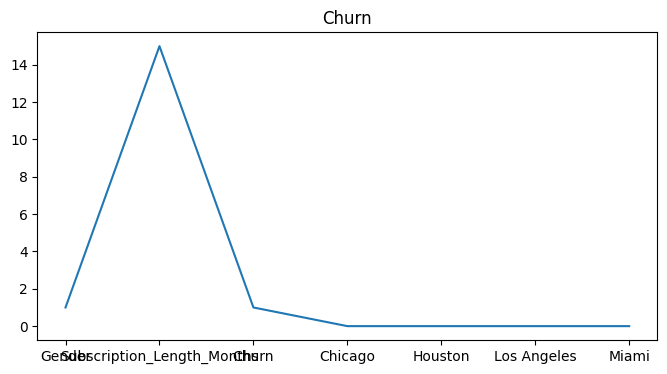

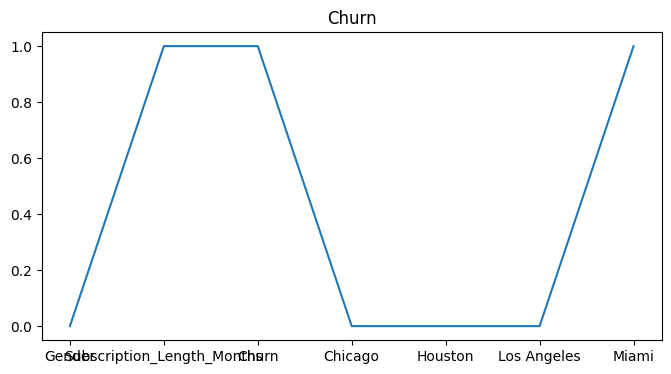

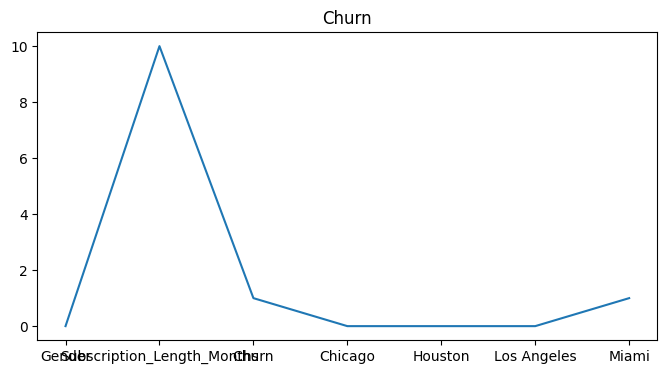

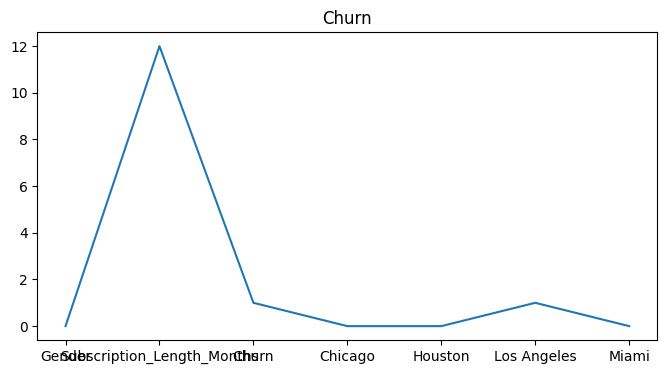

In [97]:
[(plt.figure(figsize=(8,4)), plt.title('Churn'), plt.plot(data[data['Churn'] == 1].iloc[i][0:-1])) for i in range(5)];

ML Model

In [98]:
from sklearn.model_selection import train_test_split
X = data.drop(['Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train,y_test  = train_test_split(X, y, test_size=.3)

In [99]:
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(70000, 7), (30000, 7), (70000,), (30000,)]

In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf =RandomForestClassifier()

In [101]:
# train model
train_data = clf.fit(X_train,y_train)

In [102]:
# predictions
predictions = train_data.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 1, 0])